# Convergence of 3D tweezer potential

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Lifetime fitting

Test case for 1D

/storage/hpc/work/kh30/hw50/DVR/src/dynamics.py:123: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if t is 0:


param_set: model is Gaussian potential.
['x']-reflection symmetry is used.
1D N=20 R0=[3.]w
freq=[39.4]kHz
Gaussian potential starts.
n=[26], dx=[0.15]w, p=[0], model=Gaussian,
t=[0.],
t_step=[0.]
starts.
Matrix size= 53
Estimated full matrix memory usage, float: 0.02 MiB, complex: 0.04 MiB
Parameter setting time: 0.00s.

init_state: initial state of T+0.5V is calculated.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.01s.
H_solver: eigenstates memory usage: 0.04 MiB.
Initial state preparation finished. Time spent: 0.01s.

H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.04 MiB.
H_mat: n=[26] dx=[0.15]w p=[0] Gaussian starts.
H_mat: H matrix memory usage: 0.04 MiB.
H_solver: free particle Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage

([<matplotlib.figure.SubFigure at 0x7f3cea3845e0>],
 [[<AxesSubplot:title={'center':'1D Gaussian gs population \nw/ freq=39.400kHz $R_0$=[3.]w'}, xlabel='t/s', ylabel='$\\rho$'>]])

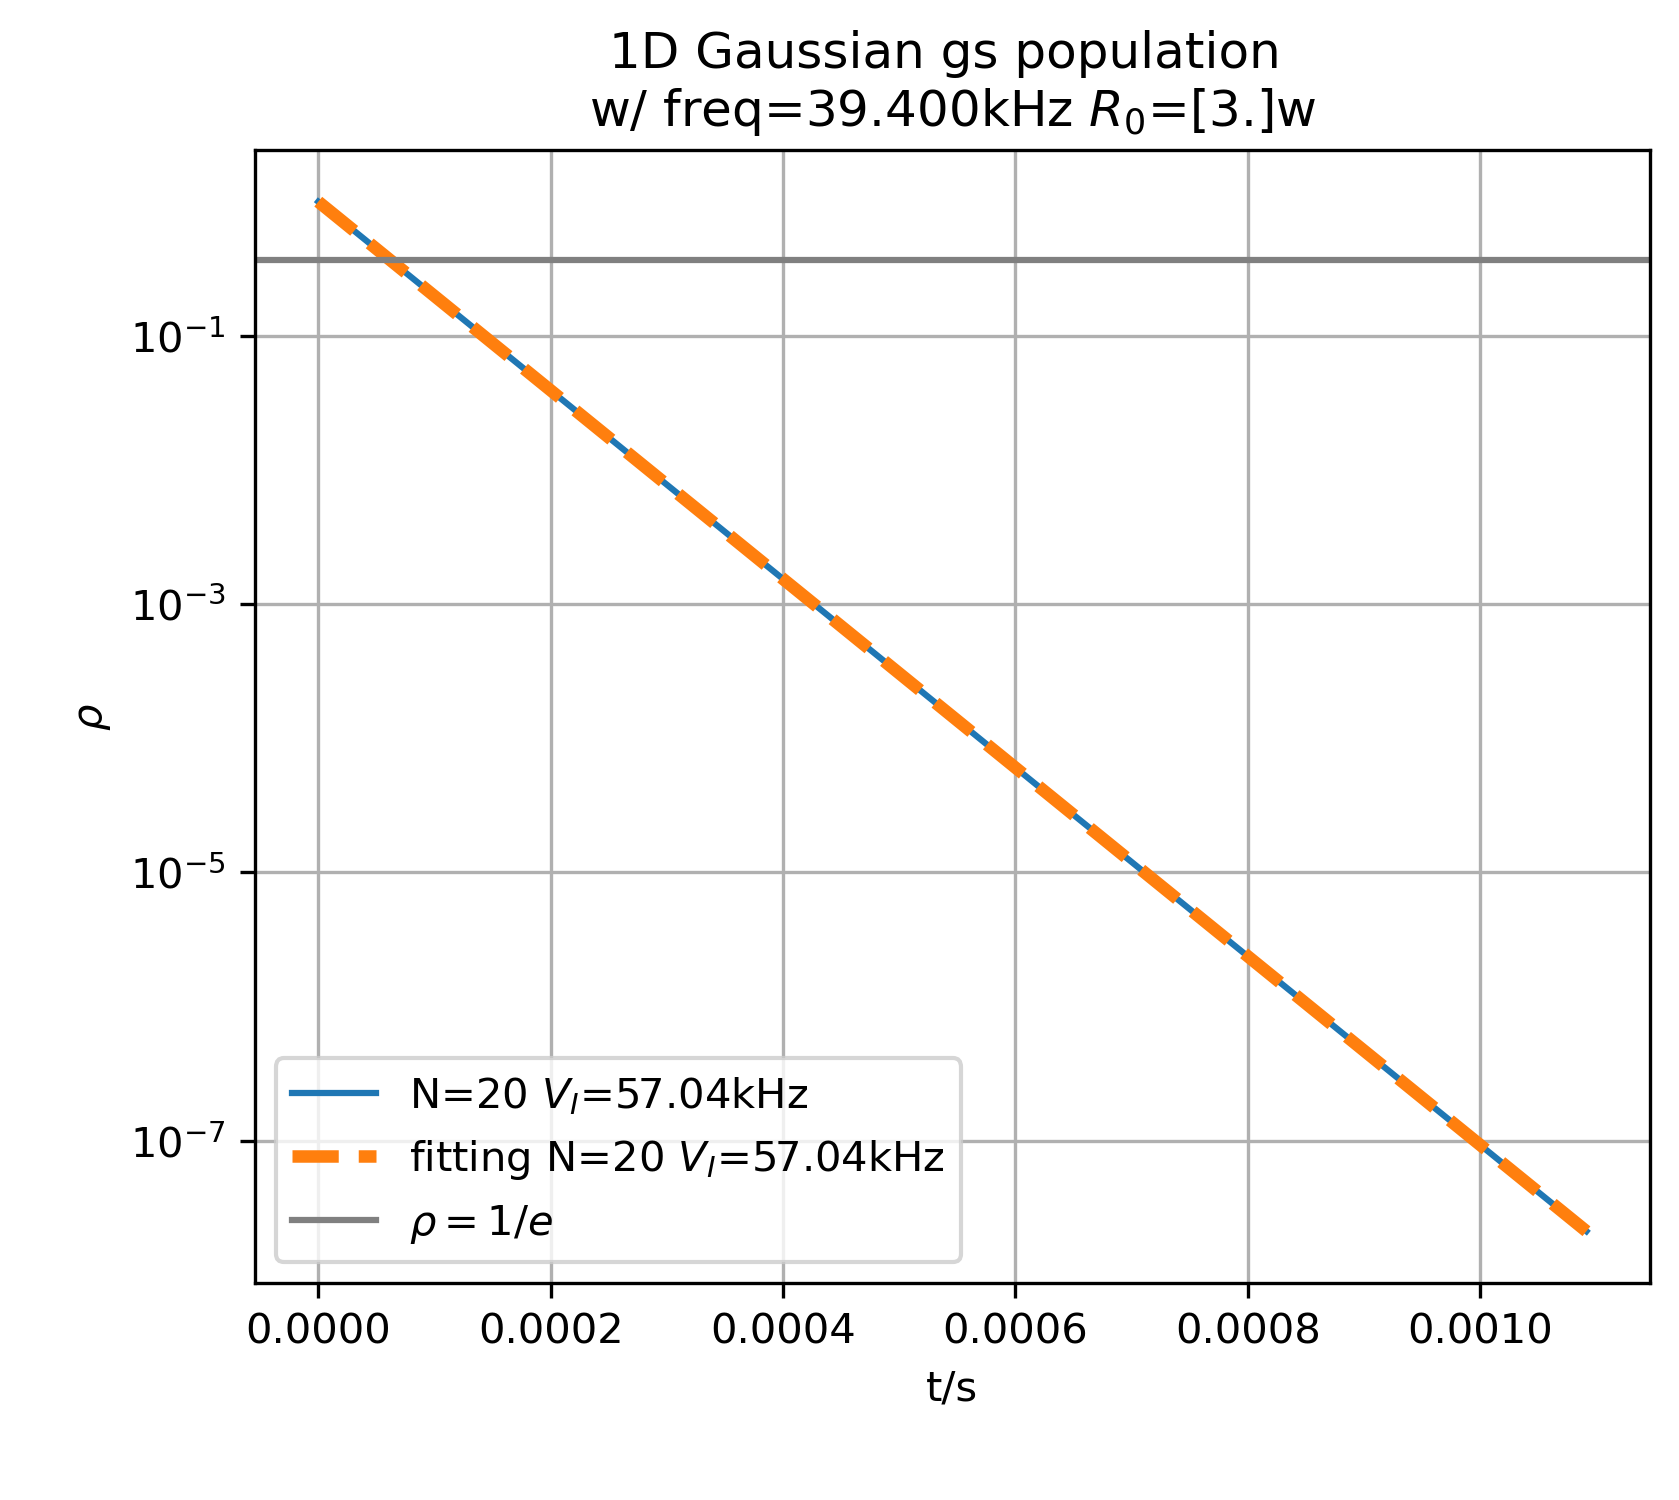

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

N = 20
freq = 39.4
os.system(
    'python3 -u dynamics_exe.py -a -n {} -d 1 -m Gaussian -f {}'.format(
        N, freq))
os.system('mv *.h5 ../output')

N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.array([freq])
an = 0
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=1,
         model='Gaussian',
         wavefunc=False,
         realtime=False,
         symmetry=True,
         absorber=True)

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              dvr=p,
              length=length,
              avg_no=an,
              fit=True)

3D

/storage/hpc/work/kh30/hw50/DVR/src/dynamics.py:129: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if t is 0:


param_set: model is Gaussian potential.
['x' 'y' 'z']-reflection symmetry is used.


(array([<matplotlib.figure.SubFigure object at 0x7faf86c54b50>,
       dtype=object),
 [[<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=100.000kHz $R_0$=[3.  3.  7.2]w'}, xlabel='t/s', ylabel='$\\rho$'>],
  [<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=150.000kHz $R_0$=[3.  3.  7.2]w'}, xlabel='t/s', ylabel='$\\rho$'>],
  [<AxesSubplot:title={'center':'3D Gaussian gs population \nw/ freq=200.000kHz $R_0$=[3.  3.  7.2]w'}, xlabel='t/s', ylabel='$\\rho$'>]])

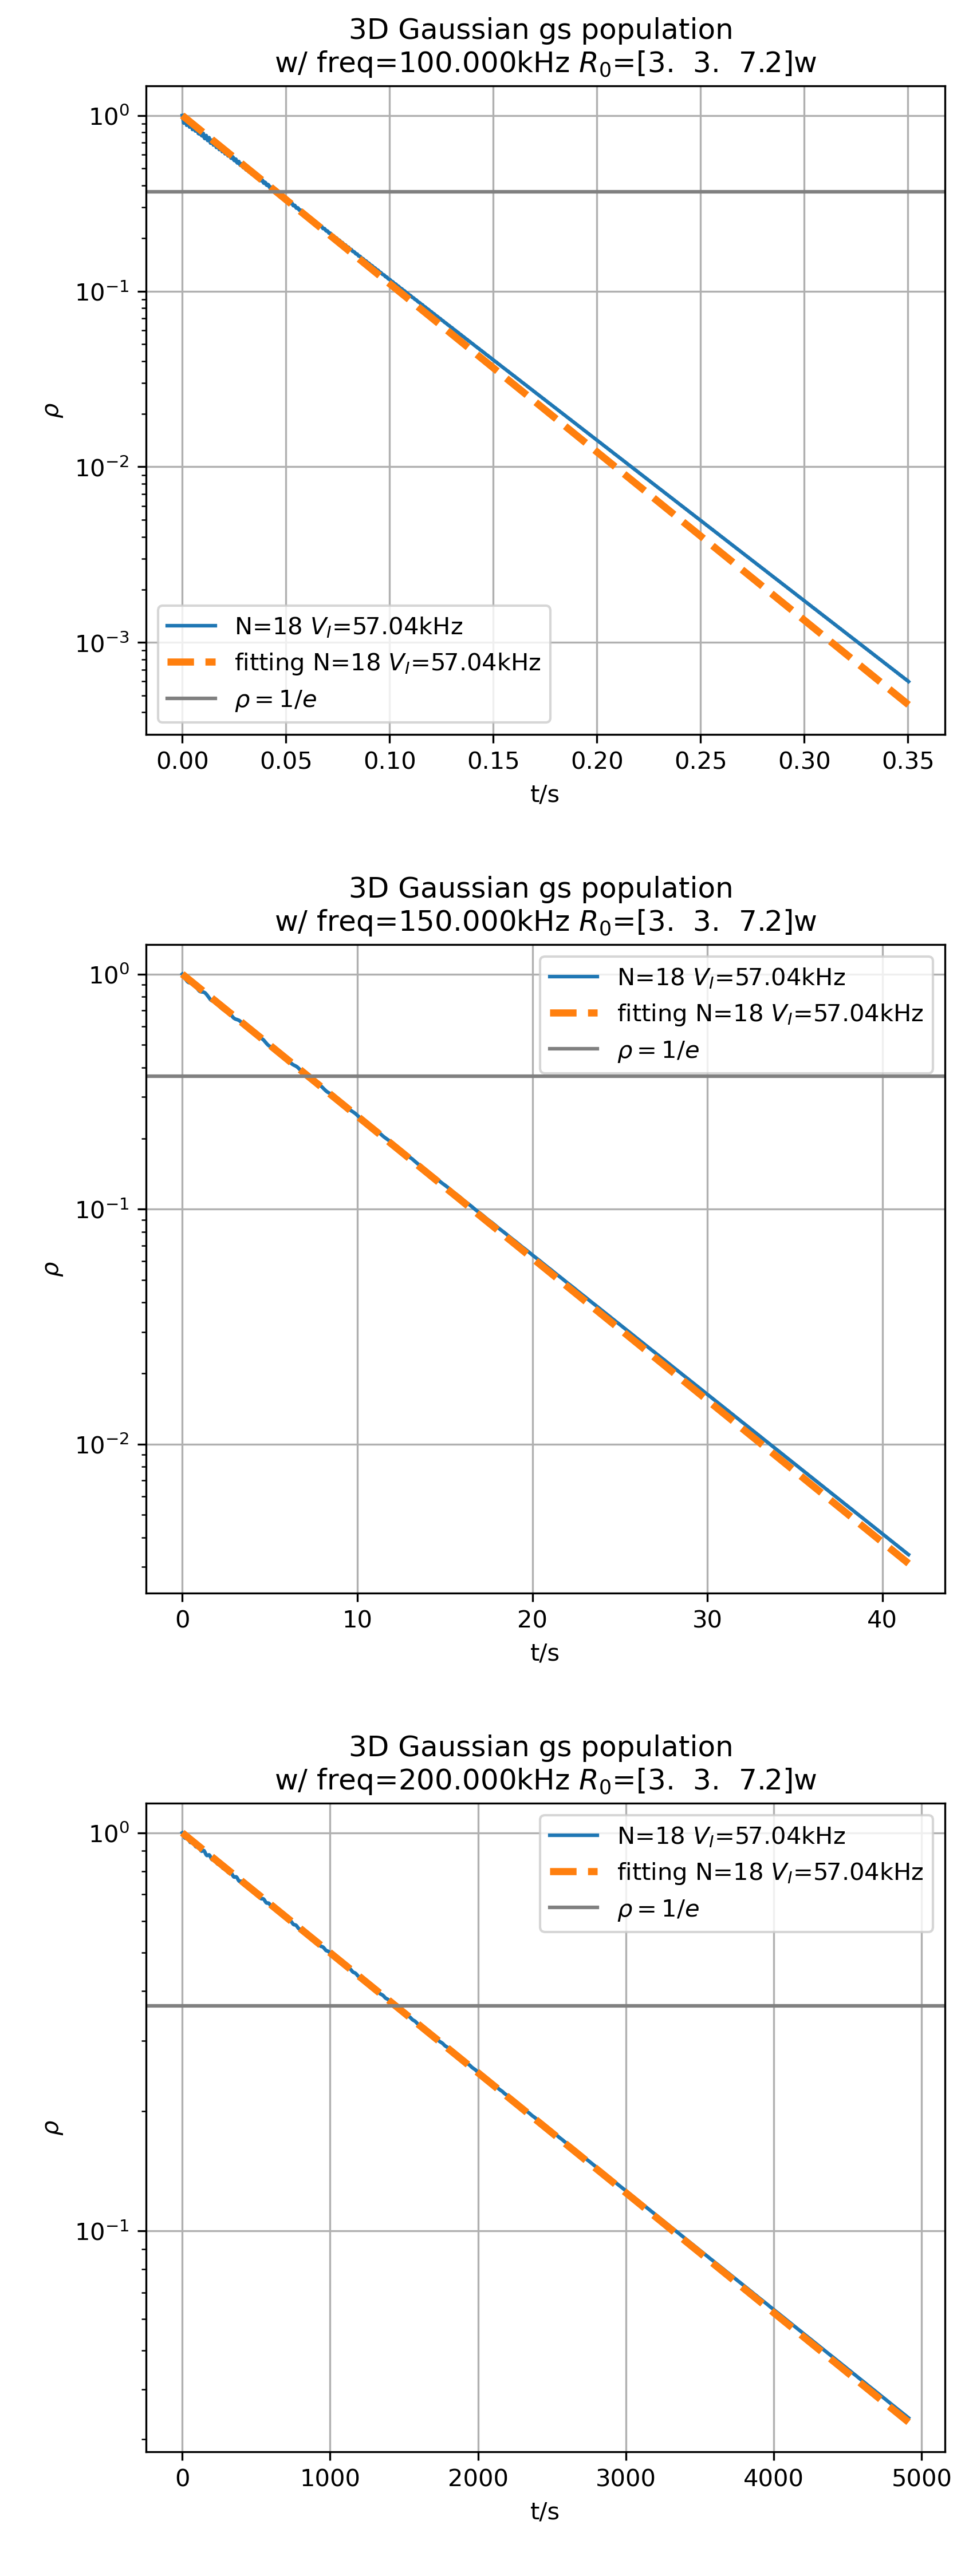

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os
from plot_dynamics import *

# N_list = range(16, 21, 2)
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 50)
an = 0
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         trap=(156, 1.18E-6),
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

plot_dynamics(N_list,
              R0_list=[R for i in range(len(N_list))],
              dvr=p,
              length=length,
              avg_no=an,
              fit=True)


## Lifetime vs Driving frequency

### Varying N

param_set: model is Gaussian potential.
['x' 'y' 'z']-reflection symmetry is used.


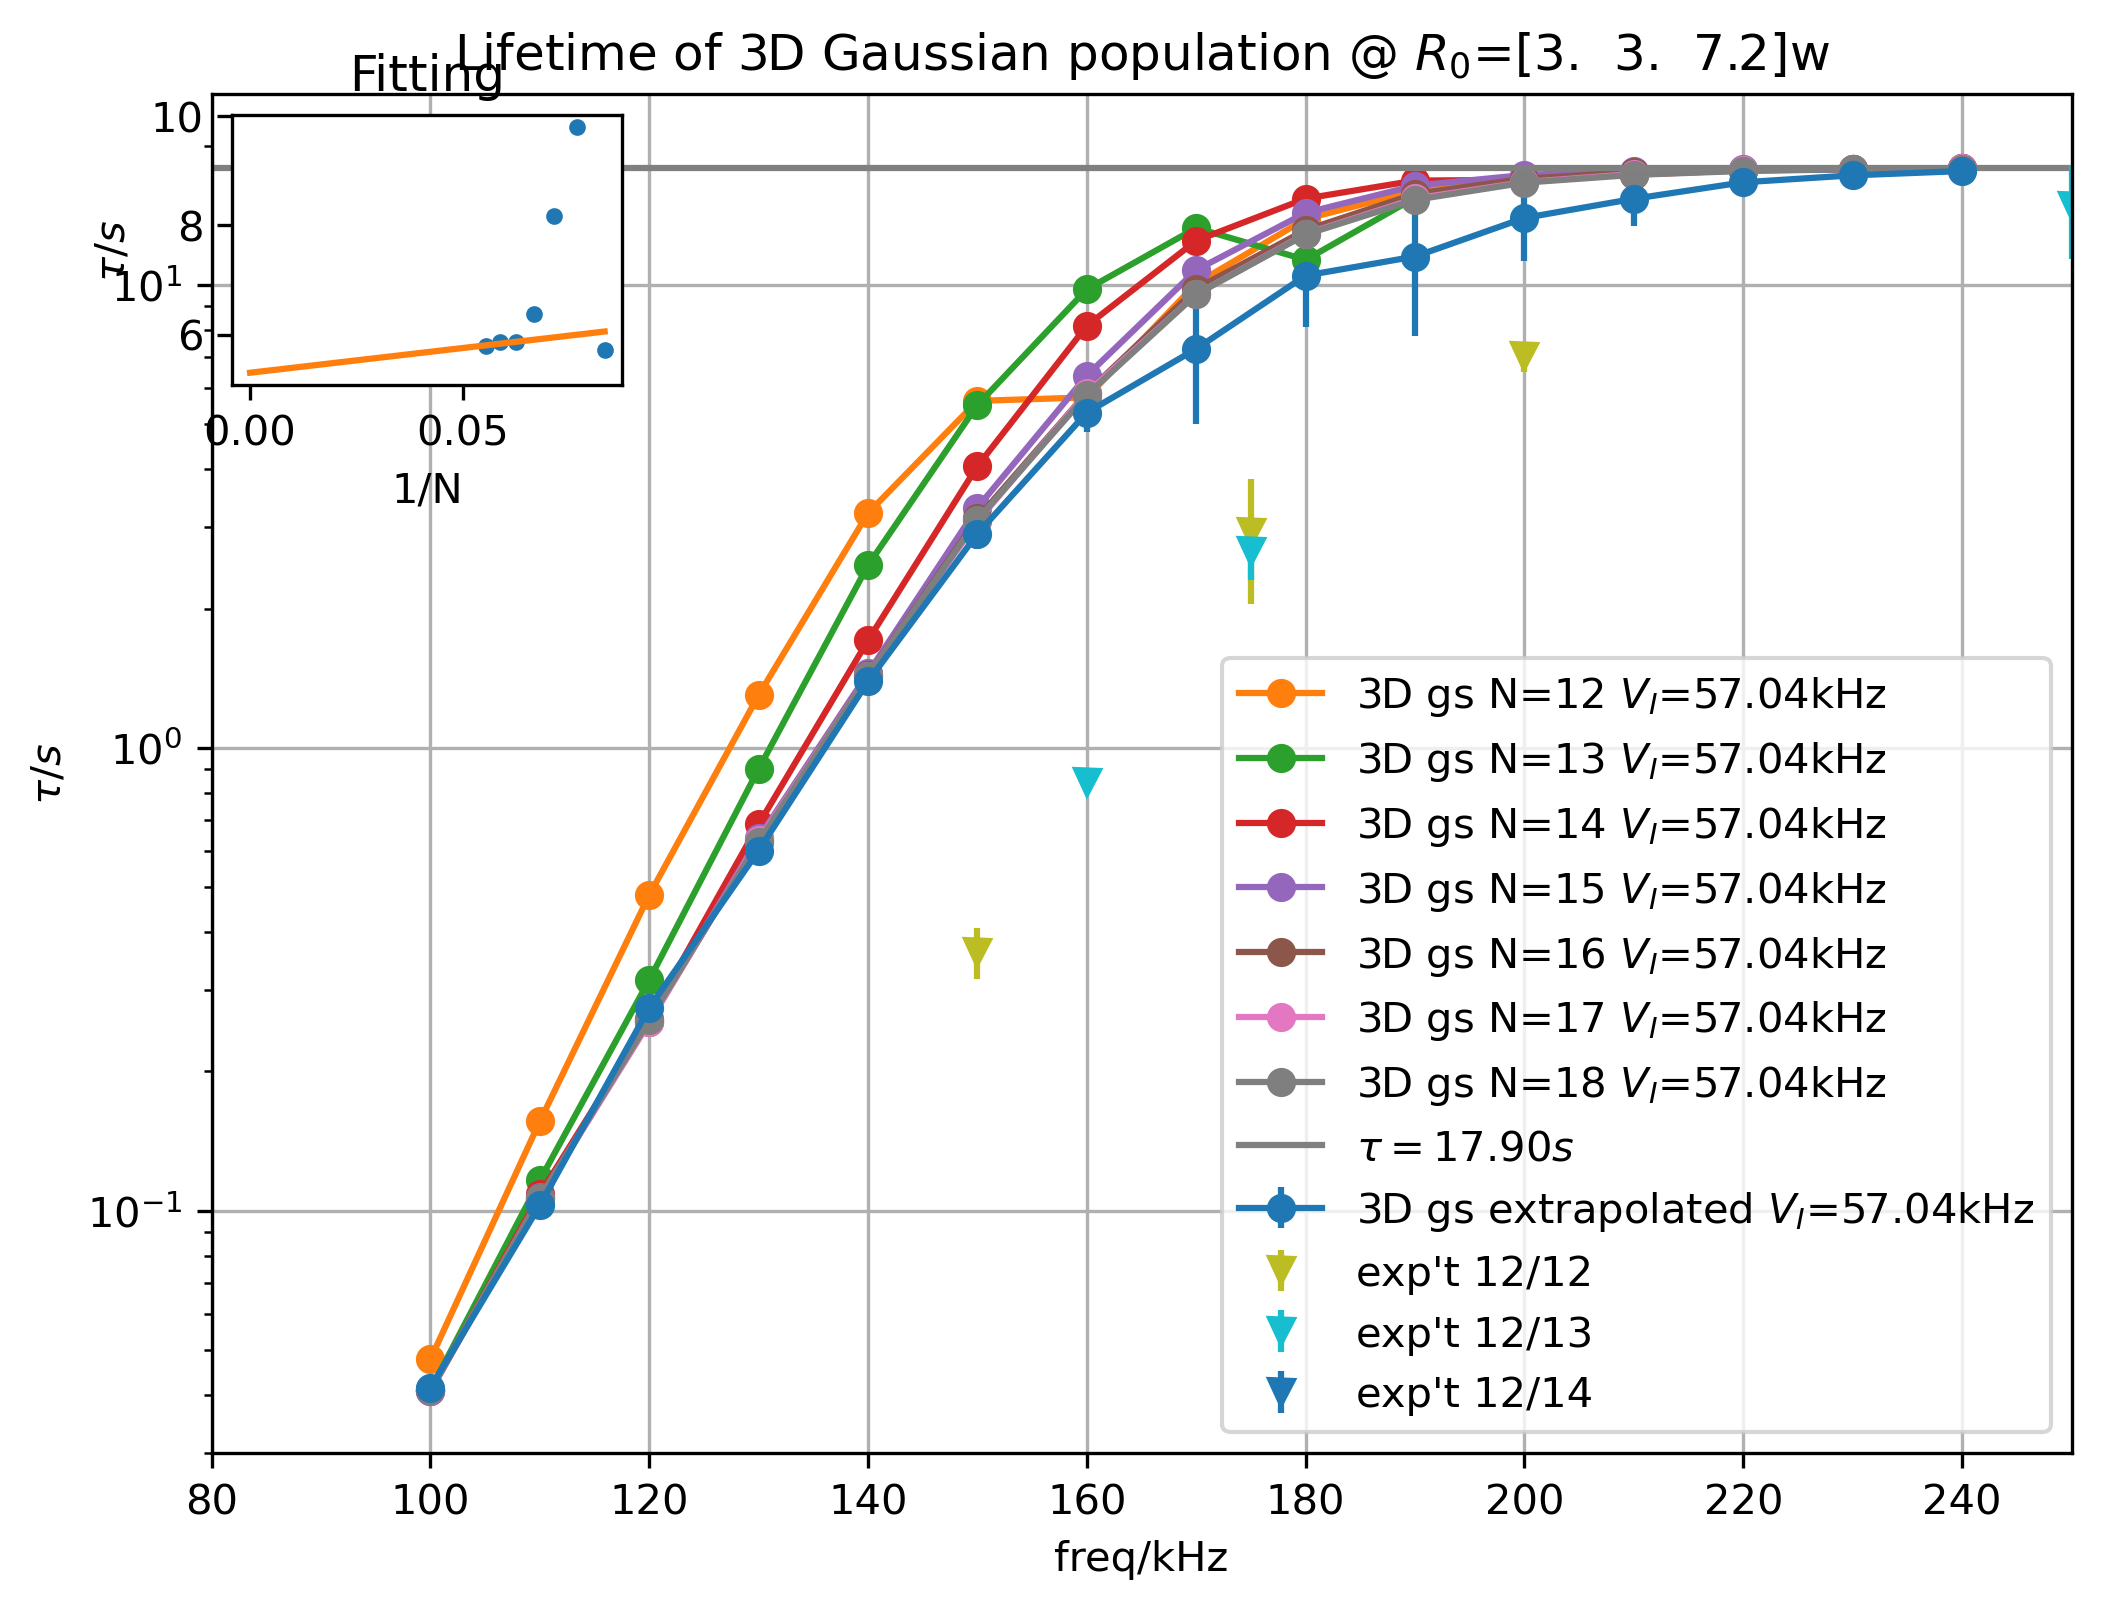

In [14]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = range(12, 19, 1)
N = 18
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
t0 = 17.9
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(N_list,
                   R0_list=[R for i in range(len(N_list))],
                   dvr=p,
                   avg_no=an,
                   tau=t0,
                #    file=True,
                   extrapolte=4)


### Varying R

In [31]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = np.arange(12, 21, 2)
dx = 3 / 18 * np.array([1, 1, 2.4], dtype=float)
R = dx * 18
N = 18
R0_list = [dx * n for n in N_list]
freq_list = np.arange(100, 250, 10)
an = 0
t0 = 17.9
length = 1
sn = 1000.0

p = plot(cvg='R',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(N_list, R0_list, dvr=p, avg_no=an, tau=t0, extrapolte=0)


param_set: model is Gaussian potential.
['x' 'y' 'z']-reflection symmetry is used.


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../output/[20 20 16] [0.17 0.17 0.4 ] 104.52 18903.6 100 0.35 0.00035 Gaussian sym ab 1 0.55.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Error with varying trap depth and waist

param_set: model is Gaussian potential.
['x' 'y' 'z']-reflection symmetry is used.


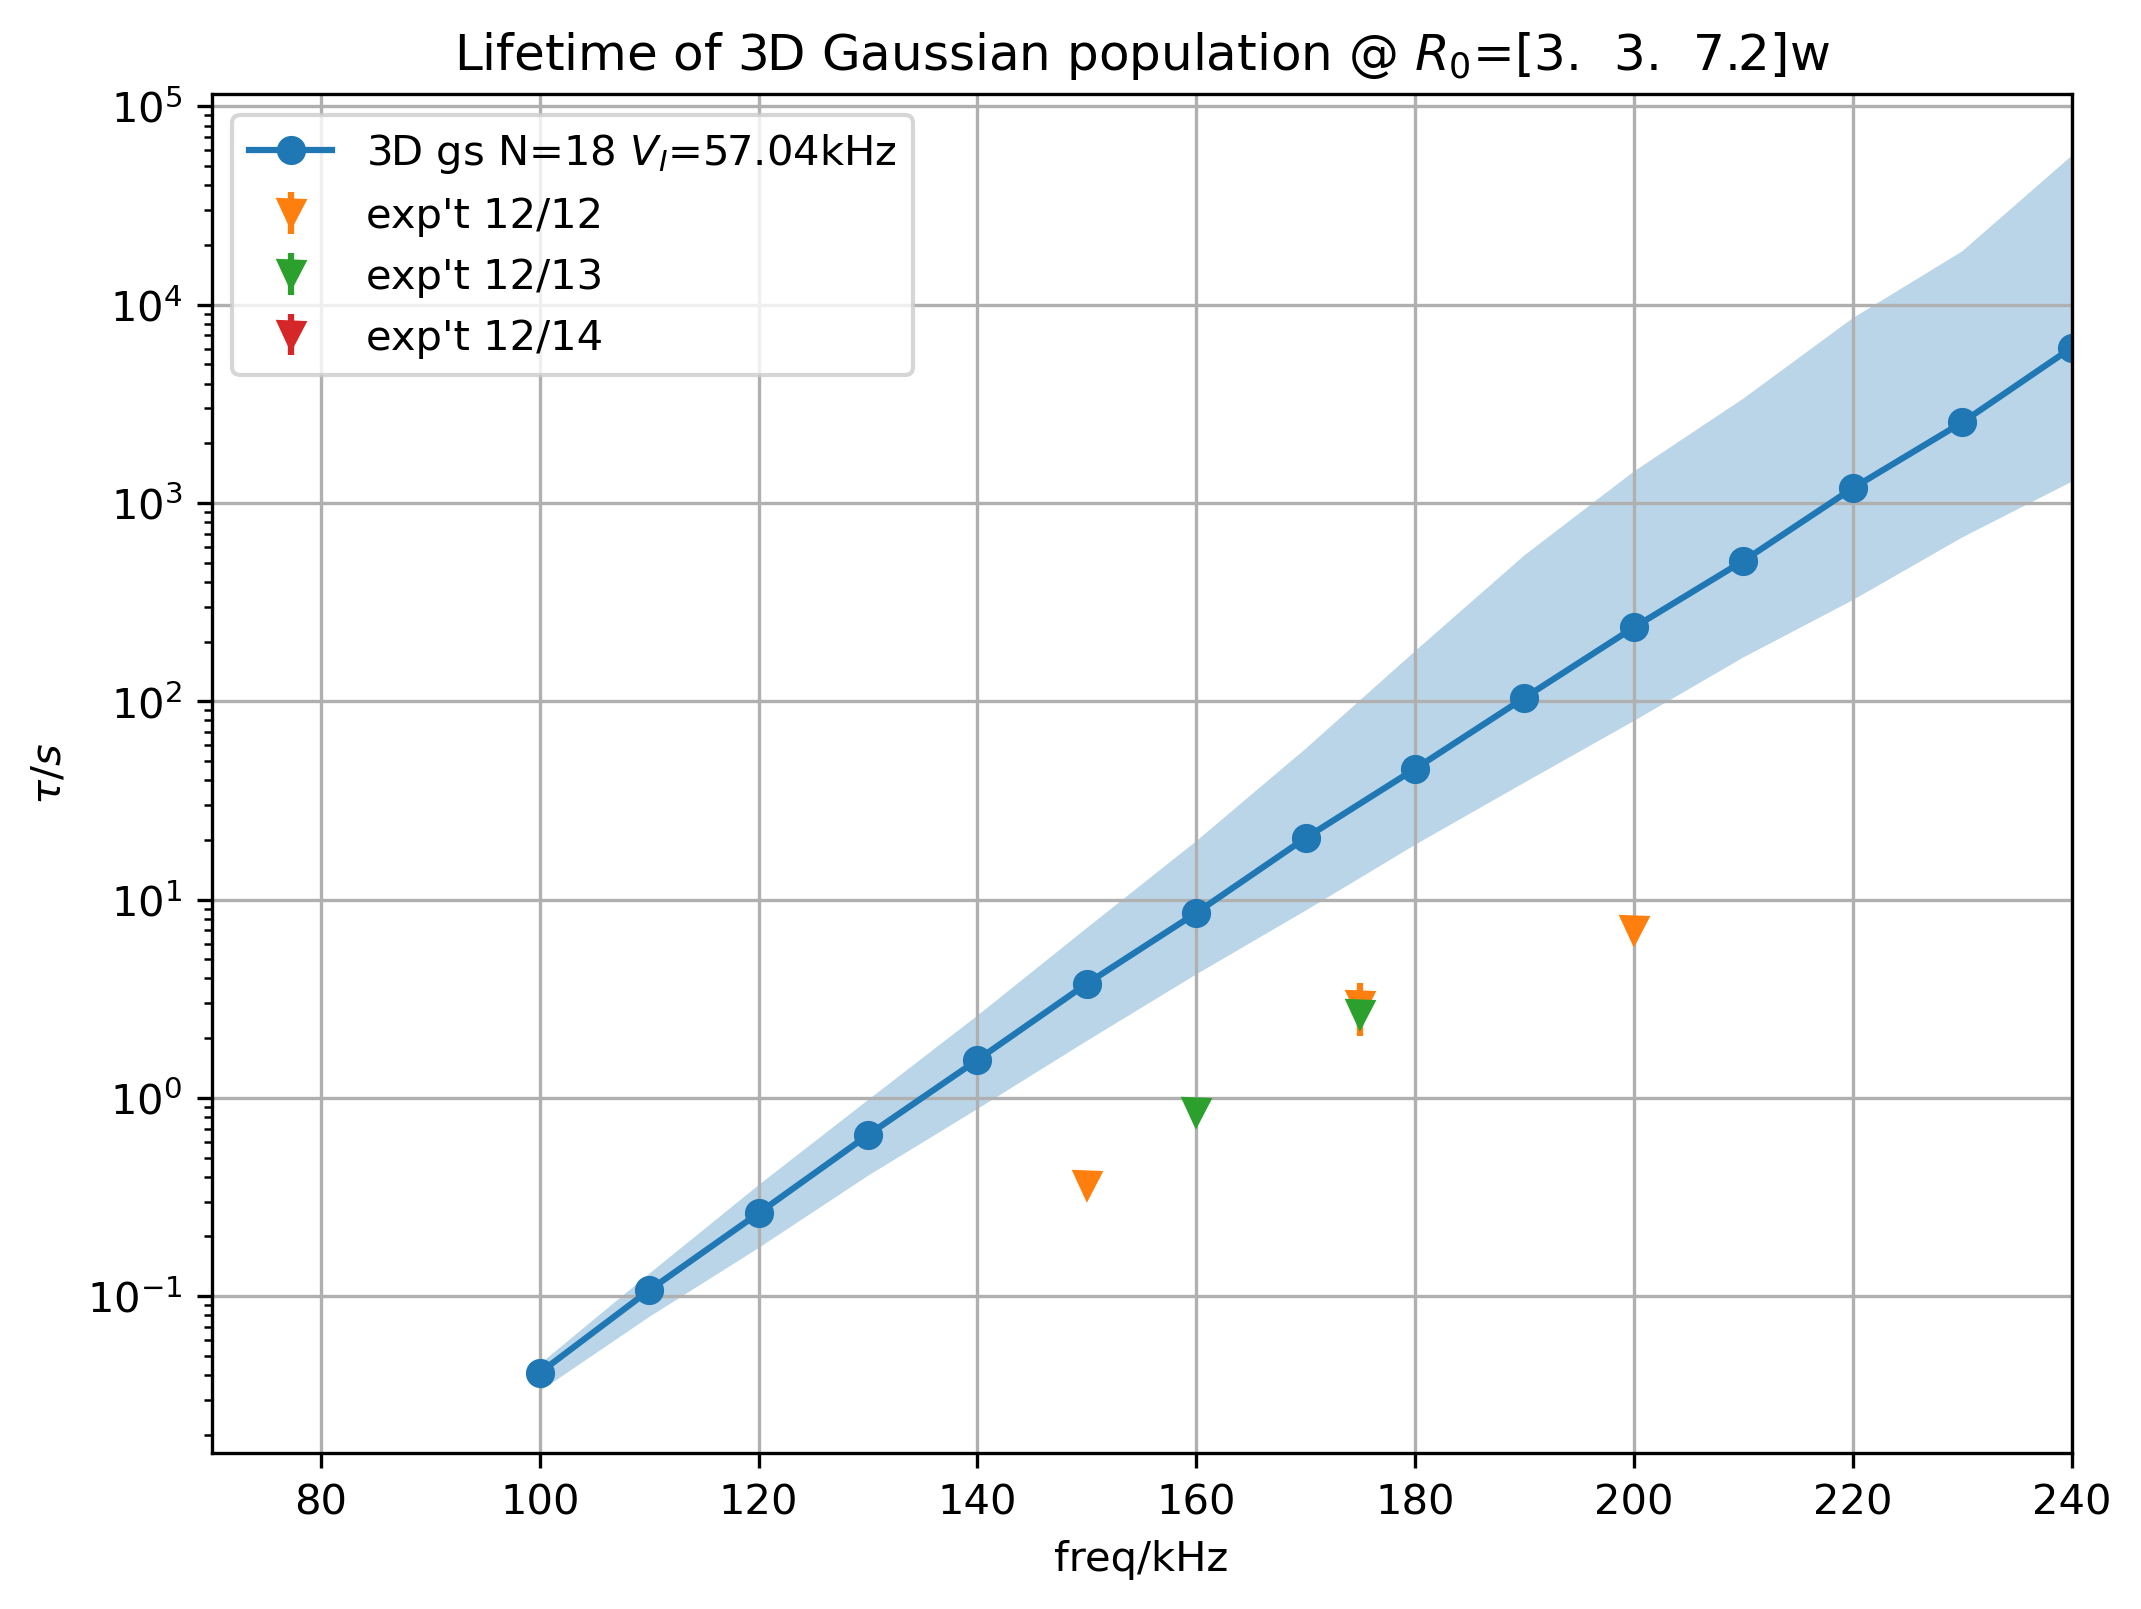

In [9]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

# N_list = range(12, 19, 2)
N = 18
N_list = range(N, N + 1, 2)
R = 3 * np.array([1, 1, 2.4])
freq_list = np.arange(100, 250, 10)
an = 0
# t0 = 17.9
t0 = np.inf
length = 1
sn = 1000.0

p = plot(cvg='N',
         quantity='gs',
         N=N,
         R0=R,
         freq_list=freq_list,
         dim=3,
         model='Gaussian',
         wavefunc=True,
         realtime=False,
         symmetry=True,
         absorber=True)

ax = plot_lifetime(N_list,
                   R0_list=[R for i in range(len(N_list))],
                   dvr=p,
                   err=True,
                   avg_no=an,
                   tau=t0)


In [ ]:
import numpy as np

N = 10000
a= np.random.rand(N)+ 1j* np.random.rand(N)
f1 = lambda a:np.linalg.norm(a)**2
f2 = lambda a:np.sum(np.abs(a)**2)
f3 = lambda a:np.inner(a.conj(),a).real
print(a.shape)
print(f1(a))
print(f2(a))
print(f3(a))
%timeit f1(a)
%timeit f2(a)
%timeit f3(a)

(10000,)
6627.3637784882285
6627.3637784882285
6627.363778488229


## Wavefunction dynamics

In [ ]:
from plot_dynamics import *
import numpy as np
import matplotlib.pyplot as plt
from DVR_exe import *
import os

N_list = range(18, 19, 1)
R = 3 * np.array([w, w, 2.4 * w])
freq_list = np.arange(0.12, 0.26, 0.04)
st = 2.5E-5 * np.exp(freq_list * 62.7)
st[np.nonzero(freq_list < .06)] = 1E-2
sn = 1000.0
plot_wavefunction(N_list,
                  R0_list=[R for i in range(len(N_list))],
                  freq_list=freq_list,
                  stop_time_list=st,
                  length=10,
                  step_no=sn,
                  dim=3,
                  symmetry=True,
                  model='Gaussian',
                  cvg='N',
                  realtime=False,
                  absorber=True)